In [56]:
# 1. Import Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# 2. Define path 

path =r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 4 /Prepared Data'

In [3]:
# 3. Import 'df_instacart_merge_updated_final_report' 

df_instacart_merge = pd.read_pickle(r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 4 /Prepared Data/df_instacart_merge_updated_final_report.pkl')

In [4]:
df_instacart_merge.shape

(32404859, 44)

In [5]:
# Part I. Create an appropriate visualization to show the distribution of profiles
df_instacart_merge.head(2)

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,income,region,prices_mean,spending_flag,customer_activity_excl_flag,age_group,income_group,n_dependants,n_dependants_group,department
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,40423,South,6.367797,low spender,low activity,30-39,low income,3,Big family,beverages
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,40423,South,6.367797,low spender,low activity,30-39,low income,3,Big family,beverages


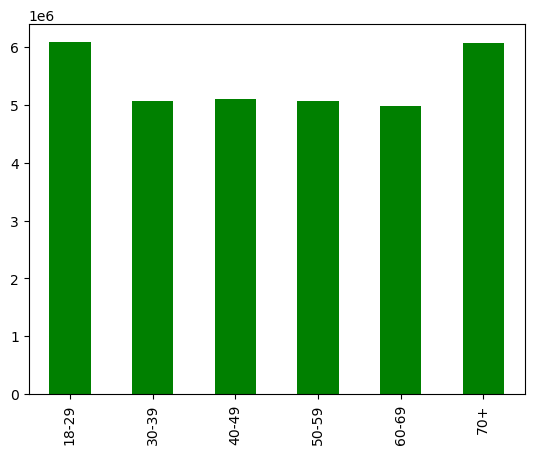

In [6]:
# Creating a bar charts for the 'age_group'

bar_age_group = df_instacart_merge['age_group'].value_counts().sort_index().plot.bar(color = ['green'])

In [7]:
# Exporting the bar chart 

bar_age_group.figure.savefig(os.path.join(path, 'bar_age_group.png'))

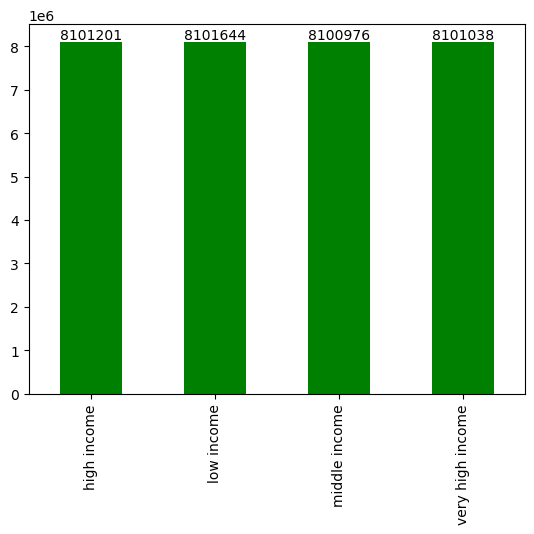

In [8]:
# Creating a bar charts for the 'income_group'

bar_income_group = df_instacart_merge['income_group'].value_counts().sort_index().plot.bar(color = ['green'])
for index, value in enumerate(df_instacart_merge['income_group'].value_counts().sort_index()):
    bar_income_group.text(index, value, str(value), ha='center', va='bottom')

In [9]:
# Export 'bar_income_group'

bar_income_group .figure.savefig(os.path.join(path, 'bar_income_group.png'))

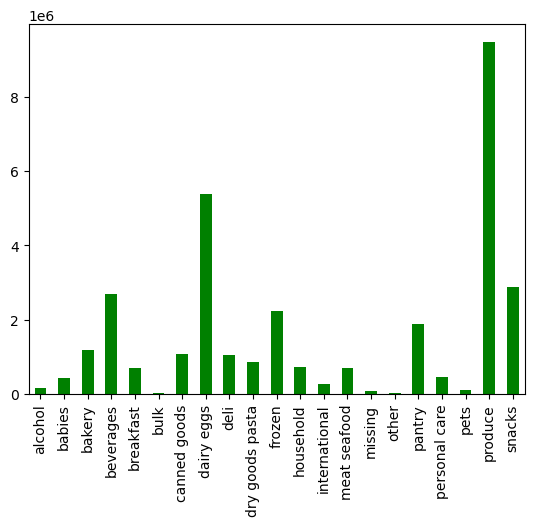

In [10]:
#  Creating a bar chart for 'department'

bar_department = df_instacart_merge['department'].value_counts().sort_index().plot.bar(color = ['green'])

In [88]:
# Export 'department'

bar_department.figure.savefig(os.path.join(path, 'bar_department.png'))

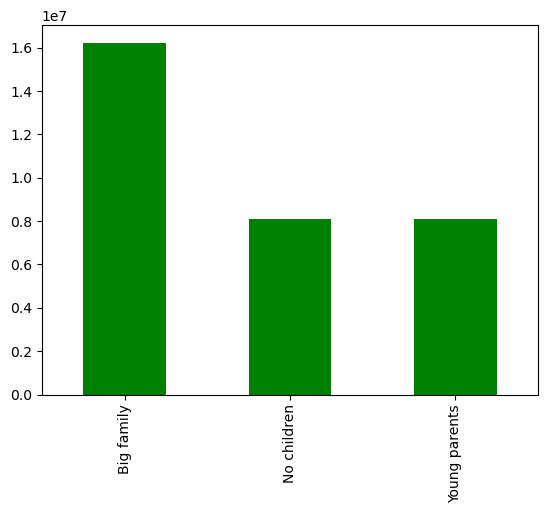

In [12]:
#  Creating a bar chart for 'n_dependants_group'

bar_n_dependants_group = df_instacart_merge['n_dependants_group'].value_counts().sort_index().plot.bar(color = ['green'])

In [13]:
# Export 'n_dependants_group'

bar_n_dependants_group.figure.savefig(os.path.join(path, 'n_dependants_group.png'))

In [14]:
# Part II. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
# 1st : Age 
Age_group_agg = df_instacart_merge.groupby('age_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [15]:
Age_group_agg

order_number             prices              
                  mean min max       mean  min      max
age_group                                              
18-29        17.107372   1  99  12.171977  1.0  99999.0
30-39        17.244223   1  99  11.933288  1.0  99999.0
40-49        17.151719   1  99  12.384515  1.0  99999.0
50-59        17.130577   1  99  11.862746  1.0  99999.0
60-69        17.137690   1  99  11.627890  1.0  99999.0
70+          17.097889   1  99  11.874439  1.0  99999.0

In [16]:
# 2nd : n_dependants_group

n_dependants_group_agg = df_instacart_merge.groupby('n_dependants_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [17]:
n_dependants_group_agg

order_number             prices              
                           mean min max       mean  min      max
n_dependants_group                                              
Big family            17.103375   1  99  12.080623  1.0  99999.0
No children           17.264622   1  99  12.129243  1.0  99999.0
Young parents         17.097906   1  99  11.629316  1.0  99999.0

In [18]:
# 3rd : income_group

income_group_agg = df_instacart_merge.groupby('income_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [19]:
income_group_agg 

order_number             prices              
                         mean min max       mean  min      max
income_group                                                  
high income         17.188468   1  99   9.830574  1.0  99999.0
low income          16.644854   1  99   7.291562  1.0  14900.0
middle income       17.435359   1  99   8.754814  1.0  99999.0
very high income    17.300576   1  99  22.044322  1.0  99999.0

In [20]:
# 4th : department

department_agg = df_instacart_merge.groupby('department').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [21]:
department_agg

order_number             prices              
                        mean min max       mean  min      max
department                                                   
alcohol            15.215751   1  99   8.143701  1.0     15.0
babies             19.310397   1  99   7.638380  1.0     15.0
bakery             17.170395   1  99   7.853809  1.0     15.0
beverages          17.225802   1  99   7.680502  1.0     15.0
breakfast          16.773669   1  99   8.028963  1.0     14.9
bulk               20.197148   1  99   8.348960  1.4     14.1
canned goods       16.165037   1  99   7.539976  1.0     15.0
dairy eggs         17.665606   1  99  33.479533  1.0  99999.0
deli               16.473447   1  99   7.778701  1.0     15.0
dry goods pasta    15.895474   1  99   7.350283  1.0     15.0
frozen             15.457838   1  99   7.736553  1.0     15.0
household          15.694469   1  99   7.384058  1.0     15.0
international      16.439806   1  99   7.682264  1.0     15.0
meat seafood       15.887671   1  99  16.294443  8.0     25.0
missing            22.902379   1  99   8.660716  1.0     15.0
other              17.277920   1  99   6.990934  1.1     15.0
pantry             16.583536   1  99   8.009443  1.0     20.0
personal care      16.170638   1  99   7.996769  1.0     15.0
pets               15.340650   1  99   7.889070  1.0     15.0
produce            17.811403   1  99   7.981708  1.0     15.0
snacks             17.177343   1  99   4.275437  1.6      7.0

In [38]:
# Part III. Compare your customer profiles with regions and departments. Can you identify a link between them?
# 1st age group with regions 

Age_group_compare = pd.crosstab(df_instacart_merge['age_group'], df_instacart_merge['region'], dropna = False)

In [24]:
Age_group_compare

region,Midwest,Northeast,South,West
age_group,,,,
18-29,1420705,1070437,2052633,1546666
30-39,1180424,888917,1723110,1281300
40-49,1227062,900208,1677004,1304963
50-59,1199596,890071,1653555,1320953
60-69,1161370,884533,1664412,1276949
70+,1408168,1088570,2021171,1562082


In [78]:
# 2nd n_dependants_group with regions 

n_dependants_group_compare = pd.crosstab(df_instacart_merge['n_dependants_group'], df_instacart_merge['region'], dropna = False)

In [26]:
n_dependants_group_compare

region,Midwest,Northeast,South,West
n_dependants_group,,,,
Big family,3765653,2862182,5430496,4167921
No children,1905200,1418301,2701659,2072343
Young parents,1926472,1442253,2659730,2052649


In [47]:
# 3dr income_group with regions 

income_group_compare = pd.crosstab(df_instacart_merge['income_group'], df_instacart_merge['region'], dropna = False)

In [28]:
income_group_compare

region,Midwest,Northeast,South,West
income_group,,,,
high income,1934891,1432106,2650186,2084018
low income,1876433,1429459,2716231,2079521
middle income,1857958,1420315,2759213,2063490
very high income,1928043,1440856,2666255,2065884


In [36]:
# 4th age_group with department 

Age_group_compare_dpt = pd.crosstab(df_instacart_merge['age_group'], df_instacart_merge['department'], dropna = False)

In [37]:
Age_group_compare_dpt

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
18-29,29771,80464,220357,499543,134294,6606,202942,1018001,197434,164427,...,137816,51327,132898,13427,7163,351810,83721,19115,1774898,544914
30-39,25118,65909,183863,414617,108948,5396,166296,852077,164566,134651,...,114751,42114,109604,10637,5547,292430,68964,14377,1492532,455142
40-49,23973,69248,184533,425165,111180,5581,167484,854998,165955,135314,...,116897,42829,111619,11153,5589,295996,71777,15226,1494172,449615
50-59,24170,65269,183655,425090,109714,5187,167598,835589,163792,137033,...,115063,41953,110445,10609,5741,293296,71241,15605,1477090,455559
60-69,22837,64885,180137,412810,106557,5368,165143,823787,162935,133132,...,113881,40836,110607,10525,5717,290708,68996,15574,1465118,440014
70+,27827,78027,219883,510898,132340,6435,198595,1014295,196567,162070,...,140258,50194,133754,12794,6534,351129,82873,17819,1775481,542306


In [41]:
# 5th n_dependants_group with department

n_dependants_group_compare_dpt = pd.crosstab(df_instacart_merge['n_dependants_group'], df_instacart_merge['department'], dropna = False)

In [42]:
n_dependants_group_compare_dpt

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
n_dependants_group,,,,,,,,,,,,,,,,,,,,,
Big family,76614,214069,585030,1345455,351247,17447,536091,2695896,526537,435305,...,372549,133532,357020,34925,17930,939262,223844,48098,4744660,1447814
No children,39118,106494,294405,674442,174577,8278,264838,1349362,265145,215262,...,180773,67713,174084,17088,9175,466757,112006,24583,2375445,720798
Young parents,37964,103239,292993,668226,177209,8848,267129,1353489,259567,216060,...,185344,68008,177823,17132,9186,469350,111722,25035,2359186,718938


In [43]:
# 3dr income_group with regions 

income_group_compare_dpt = pd.crosstab(df_instacart_merge['income_group'], df_instacart_merge['department'], dropna = False)

In [44]:
income_group_compare_dpt

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high income,35725,112900,297401,635922,168358,8292,276526,1370800,264401,226462,...,178997,69135,192236,16814,9020,481071,110187,25299,2435102,625569
low income,39749,86454,277207,776586,196565,9688,235704,1280403,259807,190357,...,194560,60931,133435,17071,9067,439817,114183,22900,2213937,1003392
middle income,35229,115346,294535,629561,167467,8790,275757,1376446,264083,225441,...,178627,70368,190922,17812,9047,473865,111307,23386,2437160,631053
very high income,42993,109102,303285,646054,170643,7803,280071,1371098,262958,224367,...,186482,68819,192334,17448,9157,480616,111895,26131,2393092,627536


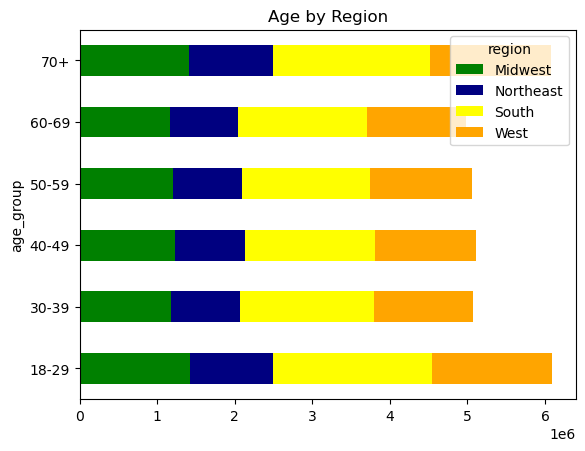

In [66]:
# Creating vizualisation 

Age_group_compare_bar = Age_group_compare.plot.barh(stacked = True, title = 'Age by Region', color = ['green', 'navy', 'yellow', 'orange'])

In [40]:
Age_group_compare_bar.figure.savefig(os.path.join(path, 'Age_group_compare_bar.png'))

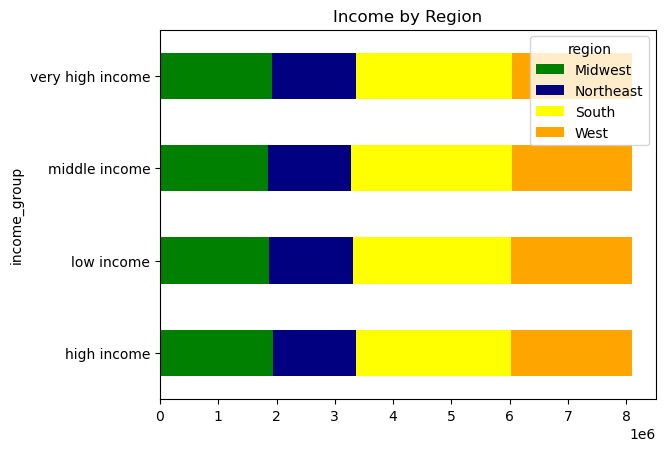

In [68]:
income_group_compare_bar = income_group_compare.plot.barh(stacked = True, title = 'Income by Region', color = ['green', 'navy', 'yellow', 'orange'])

In [69]:
income_group_compare_bar.figure.savefig(os.path.join(path, 'income_group_compare_bar.png'))

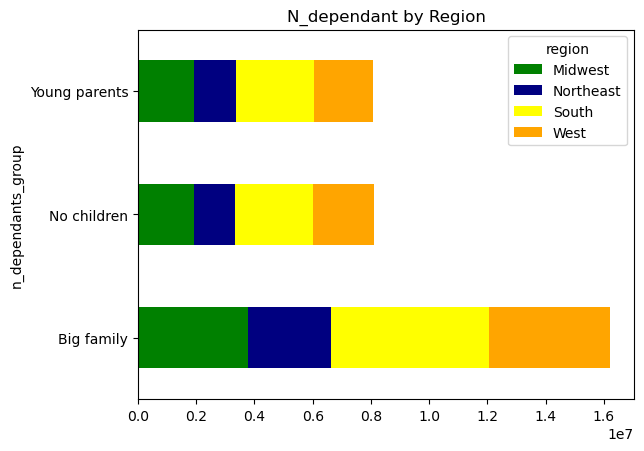

In [80]:
n_dependants_group_compare_bar = n_dependants_group_compare.plot.barh(stacked = True, title = 'N_dependant by Region', color = ['green', 'navy', 'yellow', 'orange'])

In [82]:
n_dependants_group_compare_bar.figure.savefig(os.path.join(path, 'n_dependants_group_compare_bar.png'))

In [84]:
spending_flag_compare = pd.crosstab(df_instacart_merge['spending_flag'], df_instacart_merge['region'], dropna = False)

In [85]:
spending_flag_compare 

region,Midwest,Northeast,South,West
spending_flag,,,,
high spender,155975,108225,209691,160354
low spender,7441350,5614511,10582194,8132559


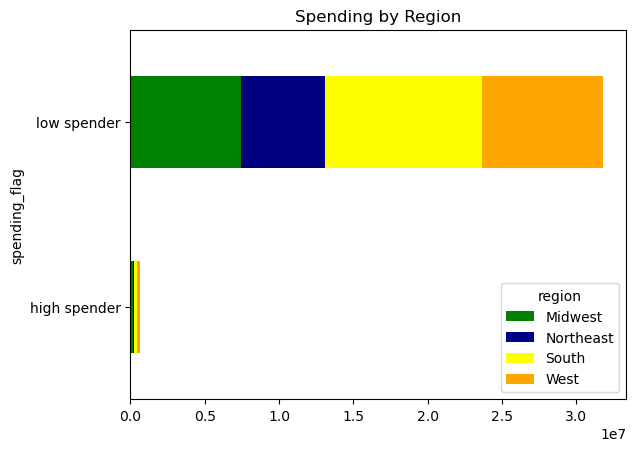

In [86]:
spending_flag_compare_bar = spending_flag_compare.plot.barh(stacked = True, title = 'Spending by Region', color = ['green', 'navy', 'yellow', 'orange'])

In [87]:
spending_flag_compare_bar.figure.savefig(os.path.join(path, 'spending_flag_compare_bar.png'))

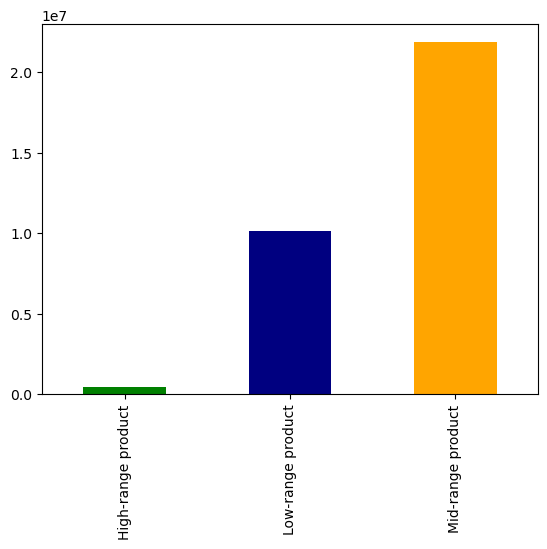

In [89]:
Price_range_bar= df_instacart_merge['price_range_loc'].value_counts().sort_index().plot.bar(color = ['green', 'navy', 'orange'])

In [90]:
Price_range_bar.figure.savefig(os.path.join(path, 'Price_range_bar.png'))

In [97]:
n_dependants_group_dpt_compare = pd.crosstab(df_instacart_merge['department'], df_instacart_merge['n_dependants_group'], dropna = False)

In [98]:
n_dependants_group_dpt_compare

n_dependants_group,Big family,No children,Young parents
department,,,
alcohol,76614,39118,37964
babies,214069,106494,103239
bakery,585030,294405,292993
beverages,1345455,674442,668226
breakfast,351247,174577,177209
bulk,17447,8278,8848
canned goods,536091,264838,267129
dairy eggs,2695896,1349362,1353489
deli,526537,265145,259567


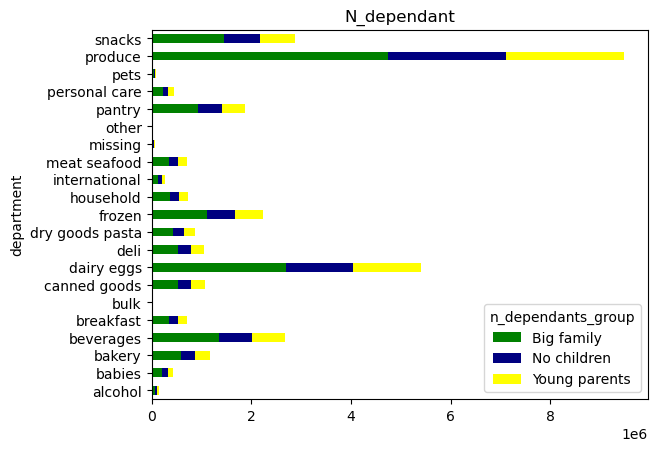

In [99]:
n_dependants_group_dpt_compare_bar = n_dependants_group_dpt_compare.plot.barh(stacked = True, title = 'N_dependant', color = ['green', 'navy', 'yellow', 'orange'])

In [100]:
age_group_dpt_compare = pd.crosstab(df_instacart_merge['department'], df_instacart_merge['age_group'], dropna = False)

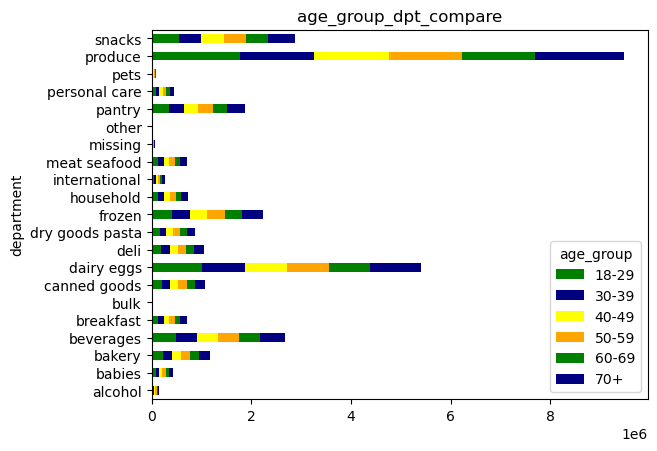

In [101]:
age_group_dpt_compare_bar = age_group_dpt_compare.plot.barh(stacked = True, title = 'age_group_dpt_compare', color = ['green', 'navy', 'yellow', 'orange'])

In [ ]:
scatterplot_fam_age_order = sns.scatterplot(x='age_group', y='n_dependants_group', data=df_instacart_merge, hue='order_number')

In [ ]:
# Can you identify a link between them? The region of the south seems to be the most importan and dynamis regions with highest counts of families, spender (high and low spending). Also, without much surprise, big families orders more that young parents or people without children. 